STS Experimental Work 

In [238]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

In [239]:
file_path = "P:/SFEM Data/SFEM/2023/2023-11-10/STS_010.dat"

In [240]:
#Initialise a list to store header lines
header_lines = []

# Read the .dat file to find the starting line of the data
with open(file_path, 'r') as file:
    for line_num, line in enumerate(file):
        if "[DATA]" in line:
            start_line = line_num + 1
            break
        header_lines.append(line.strip())

#print("Header Info:")
#for header_line in header_lines:
    #print(header_line)

# Read the data using pandas, skipping rows until the starting line of the data
data = pd.read_csv(file_path, delimiter='\t', skiprows=start_line)
    
# Print the column names in bold without a label
column_names = data.columns.tolist()
print("\033[1m" + ", ".join(column_names) + "\033[0m")




Bias calc (V), Current (A), Tip Current (A), Bias (V), Z (m), Current [bwd] (A), Tip Current [bwd] (A), Bias [bwd] (V), Z [bwd] (m)


In [241]:
I = data['Current (A)']
V = data['Bias (V)']

In [242]:
dydx = np.gradient(I, V)
epsilon = 1e-8
I_V = I / (V + epsilon)
dIdV_I_V = dydx / I_V

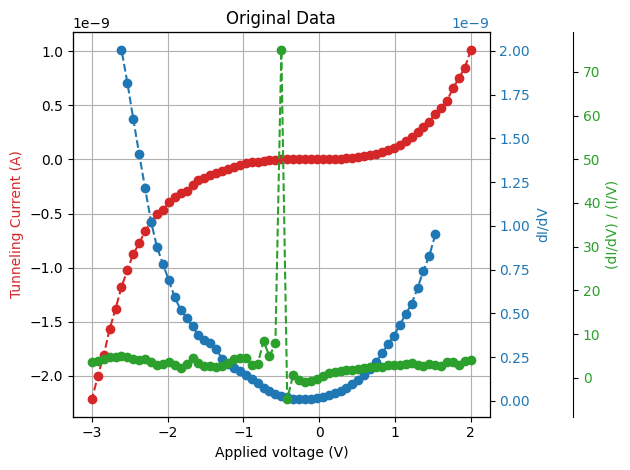

In [257]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Applied voltage (V)')

ax1.set_ylabel('Tunneling Current (A)', color=color)
ax1.plot(V, I, 'o--', color=color)
ax1.set_title('Original Data')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('dI/dV', color=color)
ax2.plot(V, dydx, 'o--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1.twinx()
color = 'tab:green'
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('(dI/dV) / (I/V)', color=color)
ax3.plot(V, dIdV_I_V, 'o--', color=color)
ax3.tick_params(axis='y', labelcolor=color)
    
ax1.grid(True)
fig.tight_layout()
plt.show()


In [263]:
dIdV_I_V_diff = abs(dIdV_I_V.diff())

In [264]:
print("Difference:",dIdV_I_V_diff)

Difference: 0          NaN
1     0.393500
2     0.782072
3     0.593467
4     0.063584
        ...   
60    0.232981
61    0.004254
62    0.464959
63    0.598586
64    0.129226
Length: 65, dtype: float64


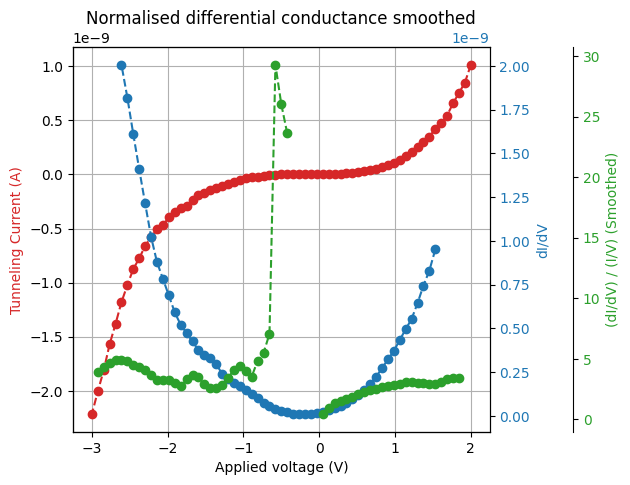

In [258]:
# Specify the window size for the moving average
#window_size = 3
# Apply a moving average to smooth out the data
#smoothed_dIdV_I_V = dIdV_I_V.rolling(window=window_size, center=True).mean()
# Alternatively, you can replace negatives with NaN:
#smoothed_dIdV_I_V[smoothed_dIdV_I_V <= 0] = np.nan


# Set a threshold for unexpected jumps
threshold_jump = 0.1  # Adjust this threshold based on your data characteristics

# Identify and exclude data points with unexpected jumps
smoothed_dIdV_I_V_diff = smoothed_dIdV_I_V.diff()
outlier_indices_jump = (smoothed_dIdV_I_V_diff.abs() > threshold_jump).any()
smoothed_dIdV_I_V[outlier_indices_jump] = np.nan

# Trim 'V' and 'smoothed_dIdV_I_V' to have the same length
V = V[:len(smoothed_dIdV_I_V)]
smoothed_dIdV_I_V = smoothed_dIdV_I_V[:len(V)]


# Create the multi-axis plot with the smoothed data

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Applied voltage (V)')
ax1.set_ylabel('Tunneling Current (A)', color=color)
ax1.plot(V, I, 'o--', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('dI/dV', color=color)
ax2.plot(V, dydx, 'o--', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax3 = ax1.twinx()
color = 'tab:green'
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('(dI/dV) / (I/V) (Smoothed)', color=color)
ax3.plot(V, smoothed_dIdV_I_V, 'o--', color=color)
ax3.tick_params(axis='y', labelcolor=color)



ax1.set_title('Normalised differential conductance smoothed')
ax1.grid(True)

fig.tight_layout()
plt.show()

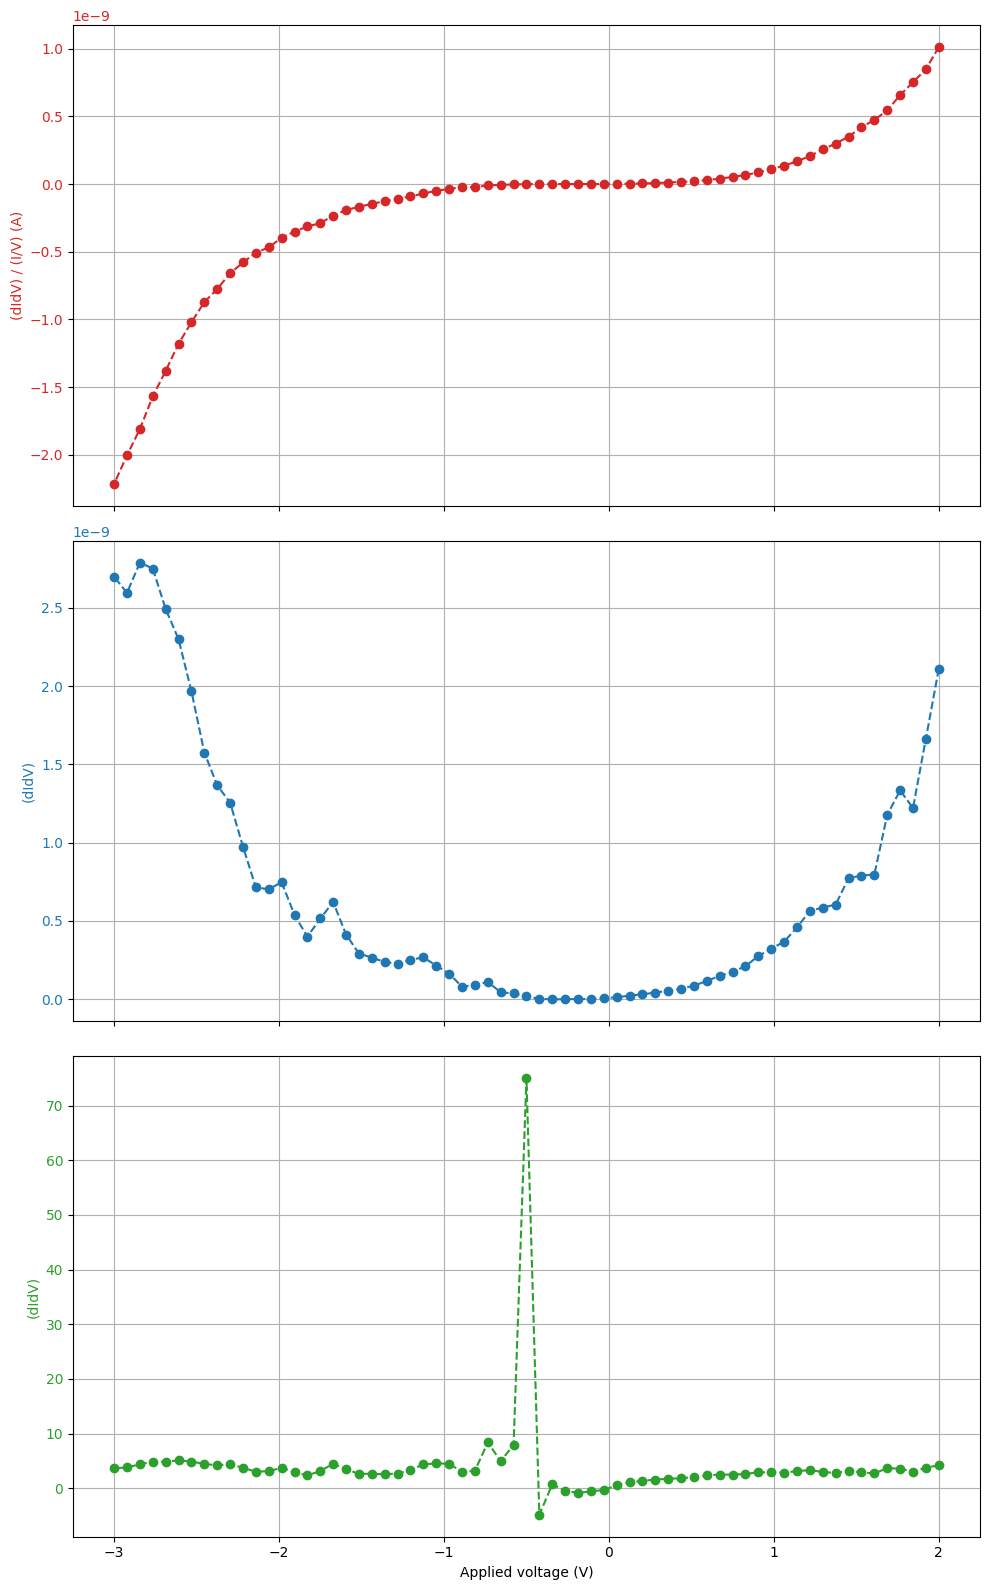

In [245]:
# Create separate plots for original and smoothed data
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 16), sharex=True)

# Plot original 'Current (A)' and 'Bias (V)' data
color = 'tab:red'
ax1.set_ylabel('(dIdV) / (I/V) (A)', color=color)
ax1.plot(V, I, 'o--', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Plot 'Differential conductance" 
color = 'tab:blue'
ax2.set_ylabel('(dIdV)', color=color)

ax2.plot(V, dydx, 'o--', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(True)



# Plot 'normalized differential conductance 
color = 'tab:green'
ax3.set_xlabel('Applied voltage (V)')
ax3.set_ylabel('(dIdV)', color=color)
ax3.plot(V, dIdV_I_V, 'o--', color=color)
ax3.tick_params(axis='y', labelcolor=color)
ax3.grid(True)


fig.tight_layout()
plt.show()

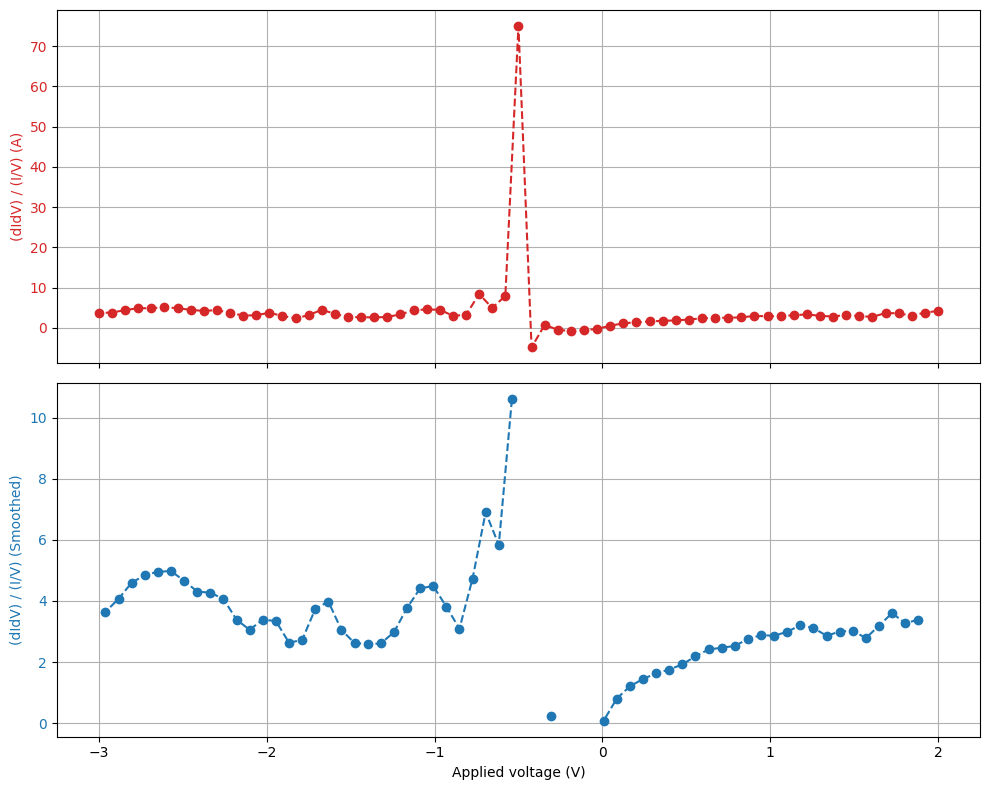

In [246]:
# Specify the window size for the moving average
window_size = 2

# Apply a moving average to smooth out the 'Current (A)' and 'Bias (V)' data
smoothed_I = data['Current (A)'].rolling(window=window_size, center=True).mean()
smoothed_V = data['Bias (V)'].rolling(window=window_size, center=True).mean()

smoothed_dydx = np.gradient(smoothed_I, smoothed_V)
epsilon = 1e-9
smoothed_I_V = smoothed_I / (smoothed_V + epsilon)
smoothed_dIdV_I_V = smoothed_dydx / smoothed_I_V

# Alternatively, you can replace negatives with NaN:
smoothed_dIdV_I_V[smoothed_dIdV_I_V <= 0] = np.nan



# Create separate plots for original and smoothed data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot original 'Current (A)' and 'Bias (V)' data
color = 'tab:red'
ax1.set_ylabel('(dIdV) / (I/V) (A)', color=color)

ax1.plot(V, dIdV_I_V, 'o--', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Plot 
color = 'tab:blue'
ax2.set_xlabel('Applied voltage (V)')
ax2.set_ylabel('(dIdV) / (I/V) (Smoothed)', color=color)

ax2.plot(smoothed_V, smoothed_dIdV_I_V, 'o--', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(True)

fig.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Your data
E_Forward =  # Your x-axis data
C_Avg =  # Your y-axis data

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Initial guess for parameters
initial_guess_gaussian = [max(C_Avg), 57, 2]

# Set constraints on parameters
bounds_gaussian = ([0, 55, 0], [np.inf, 60, np.inf])

# Fit Gaussian function
params_gaussian, covariance_gaussian = curve_fit(gaussian, E_Forward, C_Avg, p0=initial_guess_gaussian, bounds=bounds_gaussian)

# Generate fitted curve
fit_gaussian = gaussian(E_Forward, *params_gaussian)

# Plot the spectra
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=False)

# Plot original and average spectra
ax1.plot(E_Forward, C_Avg, label='Average', markersize=4, linewidth=1)

# Plot Gaussian fit
ax1.plot(E_Forward, fit_gaussian, label='Gaussian Fit', linestyle='--')

# Set labels and title for the original spectra
ax1.grid(True)
ax1.set_title('CLAM Spectra with Gaussian Fit')
ax1.set_xlabel('$E_{primary}$ / eV')
ax1.set_ylabel('$I_{SE}$ / Hz ')

# Show legend
ax1.legend()

# Specify the x and y limits for the zoomed-in region
zoomed_in_x_range = [55, 60]  # Adjust as needed
ax1.set_xlim(zoomed_in_x_range)

# Plot normalized spectra
# Assuming you have the data for the normalized spectra, update this part accordingly
ax2.plot(energy_loss_spectrum, C_Avg_Norm, markersize=4, linewidth=1, label='Average')

# Set labels and title for the normalized spectra
ax2.grid(True)
ax2.set_title('Normalised CLAM Spectra')
ax2.set_xlabel('Energy Loss / eV')
ax2.set_ylabel('${I_{SE}(E)} / {I_{a}}$ / Hz/nA ')

# Specify the x and y limits for the zoomed-in region
zoomed_in_x_range = [-5, 20]  # Adjust as needed
ax2.set_xlim(zoomed_in_x_range)

# Show legend
ax2.legend()

# Show the plot
plt.show()
